### Cross Correlation

 **Author:** Arun Prakash A, arunprakash.ece@kongu.ac.in
 
 * Assume that we have $r_x(k,l)$ for the process $x(n)$, suppose we pass $x(n)$ through a system and the system produces $y(n)$ in turn by processing $x(n)$ then what is the correlation between $x(n) \ \& \ y(n)$?
 
  $$ r_{xy}(k,l) = E\{ x(k)y(l)\} $$
 
 * If $y(n)=x(n-1)$ then the cross correlation will be $r_{xy} = r_x(k,l-1)$.
 * Most importantly, if we filter $x(n)$ with a system having an impulse response $h(n)$ then the cross correlation is given by $$r_{xy}(k,l) = h(n) \ast r_x(k,l-m)$$
 * Note also that all modifications happens with respect to $l$ variable (for the obvious reason)
 * In this notebook we generate a Gausian Random Process to illustrated the concept

In [1]:
import numpy as np
from scipy import signal as sig
from matplotlib import pyplot as plt

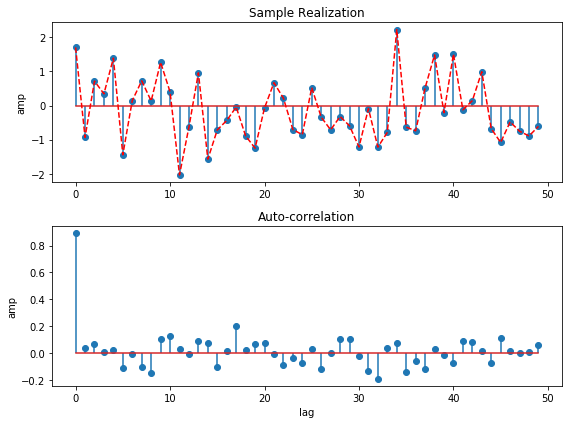

In [2]:
xn = np.random.normal(loc=0,scale=1,size=(50,100)) # 30 Rvs, 100 Realizations
rx = np.cov(xn)[0,:]
fig,ax = plt.subplots(2,1,figsize=(8,6))
ax[0].stem(xn[:,1].T,use_line_collection=True)
ax[0].plot(xn[:,1].T,'--r')
ax[0].set_title('Sample Realization')
ax[0].set_ylabel('amp')
ax[1].stem(rx,use_line_collection=True)
ax[1].set_xlabel('lag')
ax[1].set_ylabel('amp')
ax[1].set_title('Auto-correlation')
fig.tight_layout()

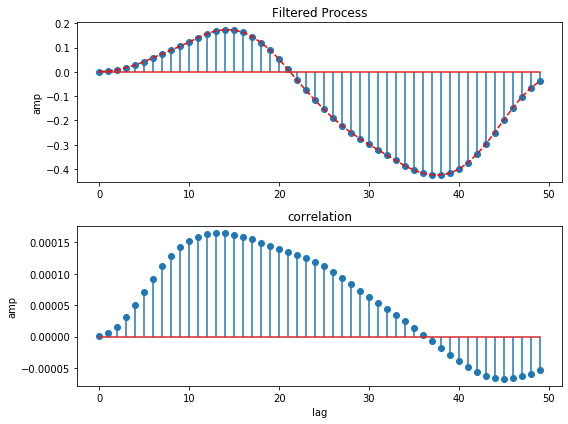

In [5]:
b,a= sig.butter(3,0.05)
yn = sig.lfilter(b,a,xn,axis=0)
ry = np.cov(yn)[1,:]
fig,ax = plt.subplots(2,1,figsize=(8,6))
ax[0].stem(yn[:,1].T,use_line_collection=True)
ax[0].plot(yn[:,1].T,'--r')
ax[0].set_title('Filtered Process')
ax[0].set_ylabel('amp')
ax[1].stem(ry,use_line_collection=True)
ax[1].set_xlabel('lag')
ax[1].set_ylabel('amp')
ax[1].set_title('correlation')
fig.tight_layout()

Let us compute the **cross correlation** between the random process $x(n) \ \& \ y(n)$ 

 1. Using the sample realizations of $x(n)$ and $y(n)$. (Direct approach)
 
 2. By filtering $r_x$ using the same function that generated $y(n)$ from $x(n)$

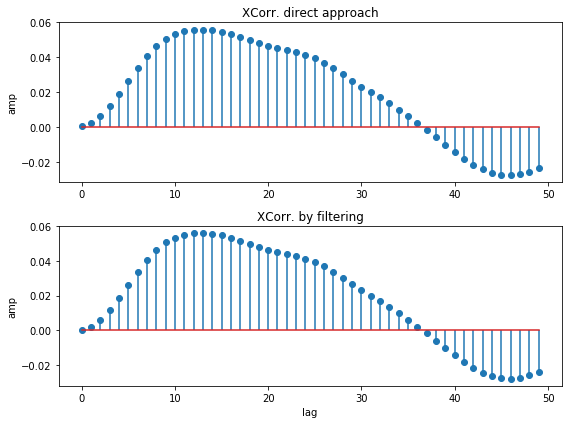

In [4]:
r_xy = np.cov(xn,yn)[0,50:] # Direct approach
R_xy = sig.lfilter(b,a,rx)  # by filtering
fig,ax = plt.subplots(2,1,figsize=(8,6))
ax[0].stem(r_xy,use_line_collection=True)
ax[0].set_title('XCorr. direct approach')
ax[0].set_ylabel('amp')
ax[1].stem(R_xy,use_line_collection=True)
ax[1].set_xlabel('lag')
ax[1].set_ylabel('amp')
ax[1].set_title('XCorr. by filtering')
fig.tight_layout()

**Key Observations**

 * It is interesting to note that having known both $r_x$ and the system function $h(n)$ allow us to compute the cross covariance    $r_{xy}$.
 * Though $r_x$ is uncorrelated (often $r_x$ belongs to white Gaussian noise), the filtered process $r_y$ and $r_{xy}$ are correlated
 * Hereafter, we deal directly with the $r_x,r_y \& \ r_{xy}$, which are deterministic, instead of the random processess. 